# Ejemplo 01:
Estas son las librerías que utilizaremos.

In [2]:
import numpy as np
import random
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [3]:
df = pd.read_csv('metro.csv')

df['tipo_pago'].unique()

df.rename(columns={'anio': 'año'}, inplace=True)

df['fecha'] = pd.to_datetime(df['fecha'])

df['dia_semana'] = df['fecha'].dt.day_name()

df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['dia'] = df['fecha'].dt.day

nuevo_orden = ['fecha', 'dia','mes','año',"dia_semana", 'linea', 'estacion', 'tipo_pago', 'afluencia']

# Reorganizar las columnas según el nuevo orden
df = df[nuevo_orden]

mapeo_dias_semana = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

# Aplica la función de mapeo a la columna 'dia_semana' usando .loc
df.loc[:, 'dia_semana'] = df['dia_semana'].map(mapeo_dias_semana)
df

,fecha,dia,mes,año,dia_semana,linea,estacion,tipo_pago,afluencia
0,2021-01-01,1,1,2021,Viernes,Línea 1,Balbuena,Boleto,1848
1,2021-01-01,1,1,2021,Viernes,Línea 1,Balbuena,Prepago,790
2,2021-01-01,1,1,2021,Viernes,Línea 1,Balbuena,Gratuidad,325
3,2021-01-01,1,1,2021,Viernes,Línea 1,Balderas,Boleto,1103
4,2021-01-01,1,1,2021,Viernes,Línea 1,Balderas,Prepago,922
...,...,...,...,...,...,...,...,...,...
569200,2023-08-31,31,8,2023,Jueves,Línea 12,Insurgentes Sur,Prepago,25758
569201,2023-08-31,31,8,2023,Jueves,Línea 12,Insurgentes Sur,Gratuidad,2810
569202,2023-08-31,31,8,2023,Jueves,Línea 12,Mixcoac,Boleto,0
569203,2023-08-31,31,8,2023,Jueves,Línea 12,Mixcoac,Prepago,11293


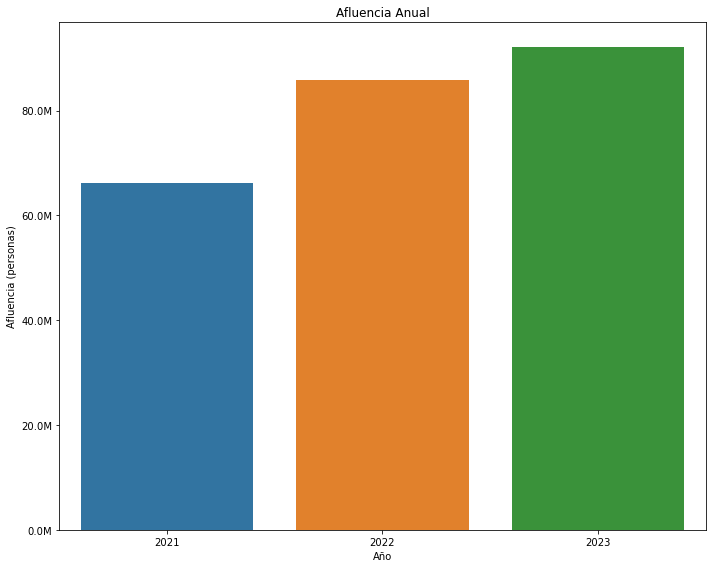

In [16]:
# Agrupar por año y mes, y calcular la suma de la afluencia en cada grupo
afluencia_por_mes_y_año = df.groupby(['año', 'mes'])['afluencia'].sum().reset_index()

# Crear una figura con dos subgráficos (uno para afluencia mensual y otro para afluencia anual)
fig, axes = plt.subplots(1, 1, figsize=(10, 8))

# Función para formatear el eje y en millones
def millones(x, pos):
    return '%1.1fM' % (x * 1e-6)

# Gráfico de afluencia anual
sns.barplot(x='año', y='afluencia', data=afluencia_por_mes_y_año, errorbar=None)
ax.set_title('Afluencia Anual')
ax.set_xlabel('Año')
ax.set_ylabel('Afluencia (personas)')
ax.yaxis.set_major_formatter(FuncFormatter(millones))  # Formatear el eje y en millones

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [4]:
df_copy = df.copy()
df_copy

,fecha,dia,mes,año,dia_semana,linea,estacion,tipo_pago,afluencia
0,2021-01-01,1,1,2021,Viernes,Línea 1,Balbuena,Boleto,1848
1,2021-01-01,1,1,2021,Viernes,Línea 1,Balbuena,Prepago,790
2,2021-01-01,1,1,2021,Viernes,Línea 1,Balbuena,Gratuidad,325
3,2021-01-01,1,1,2021,Viernes,Línea 1,Balderas,Boleto,1103
4,2021-01-01,1,1,2021,Viernes,Línea 1,Balderas,Prepago,922
...,...,...,...,...,...,...,...,...,...
569200,2023-08-31,31,8,2023,Jueves,Línea 12,Insurgentes Sur,Prepago,25758
569201,2023-08-31,31,8,2023,Jueves,Línea 12,Insurgentes Sur,Gratuidad,2810
569202,2023-08-31,31,8,2023,Jueves,Línea 12,Mixcoac,Boleto,0
569203,2023-08-31,31,8,2023,Jueves,Línea 12,Mixcoac,Prepago,11293


# Periodos de muestra

In [5]:
afluenciaMensual = df_copy.groupby(pd.Grouper(key='fecha', freq='M'))['afluencia'].sum()
afluenciaSemanal = df_copy.groupby(pd.Grouper(key='fecha', freq='W'))['afluencia'].sum()
afluenciaDiaria = df_copy.groupby('fecha')['afluencia'].sum()

In [6]:
def millions_formatter(x, pos):
    return f'{x/1e6:.0f}M'

AttributeError: 'AxesSubplot' object has no attribute 'xticks'

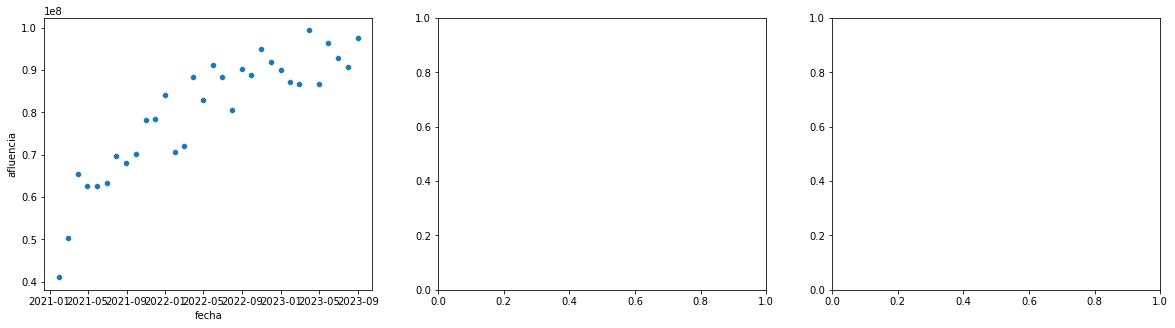

In [13]:
f, (a1,a2,a3) = plt.subplots(1,3, figsize=(20,5))

a1 = sns.scatterplot(afluenciaMensual, ax=a1)
a1.xticks(rotation=90)
a1.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

a2 = sns.scatterplot(afluenciaSemanal, ax=a2)
plt.xticks(rotation=90)
a2.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

a3 = sns.scatterplot(afluenciaDiaria, ax=a3)
plt.xticks(rotation=90)
a3.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

Regresion para datos mensuales

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [130]:
#Convert datetime to seconds from start of data to make analysis
df_mensual = afluenciaMensual.reset_index()
df_mensual['seconds'] = (df_mensual['fecha']-pd.Timestamp(df_copy['fecha'].min()))//pd.Timedelta('1s')

#Division en datos de entrenamiento y de prueba
x_train_mensual, x_test_mensual, y_train_mensual, y_test_mensual = train_test_split(df_mensual['seconds'], df_mensual['afluencia'], test_size=.2, random_state=42)

x_train_mensual = np.array(x_train_mensual)
x_test_mensual = np.array(x_test_mensual)

df_mensual_train = pd.DataFrame({'Fecha': x_train_mensual, 'Afluencia': y_train_mensual})

In [131]:
#Creacion y entrenamiento del modelo de regresion
poly_features = PolynomialFeatures(degree=2)
x_poly_mensual = poly_features.fit_transform(x_train_mensual.reshape(-1,1))
poly_model_mensual = LinearRegression()

poly_model_mensual.fit(x_poly_mensual, y_train_mensual)

LinearRegression()

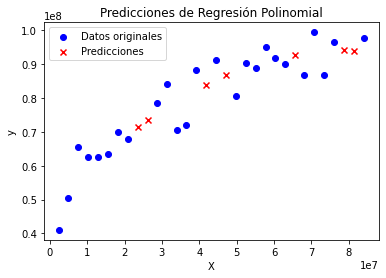

MSE en conjunto de prueba: 9961297804043.02
MSE con validación cruzada: 39513141574414.48


In [132]:
#Prediccion
x_test_mensual_poly = poly_features.transform(x_test_mensual.reshape(-1,1))
y_pred_mensual = poly_model_mensual.predict(x_test_mensual_poly)

#Calculo de error cuadratico 
mse = mean_squared_error(y_test_mensual, y_pred_mensual)

#Validacion cruzada
cv_scores = cross_val_score(poly_model_mensual, x_poly_mensual, y_train_mensual, cv=5, scoring='neg_mean_squared_error')
mse_cv = -cv_scores.mean()

# Visualizar las predicciones
plt.scatter(x_train_mensual, y_train_mensual, label='Datos originales', color='blue')
plt.scatter(x_test_mensual, y_pred_mensual, label='Predicciones', color='red', marker='x')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Predicciones de Regresión Polinomial')
plt.legend()
plt.show()

# Imprimir los resultados
print("MSE en conjunto de prueba:", mse)
print("MSE con validación cruzada:", mse_cv)

Regresion para datos semanales

In [133]:
#Convert datetime to seconds from start of data to make analysis
df_semanal = afluenciaSemanal.reset_index()
df_semanal['seconds'] = (df_semanal['fecha']-pd.Timestamp(df_copy['fecha'].min()))//pd.Timedelta('1s')

#Division en datos de entrenamiento y de prueba
x_train_semanal, x_test_semanal, y_train_semanal, y_test_semanal = train_test_split(df_semanal['seconds'], df_semanal['afluencia'], test_size=.2, random_state=42)

x_train_semanal = np.array(x_train_semanal)
x_test_semanal = np.array(x_test_semanal)

df_semanal_train = pd.DataFrame({'Fecha': x_train_semanal, 'Afluencia': y_train_semanal})

In [134]:
#Creacion y entrenamiento del modelo de regresion
poly_features = PolynomialFeatures(degree=2)
x_poly_semanal = poly_features.fit_transform(x_train_semanal.reshape(-1,1))
poly_model_semanal = LinearRegression()

poly_model_semanal.fit(x_poly_semanal, y_train_semanal)

LinearRegression()

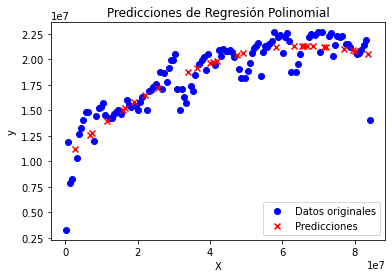

MSE en conjunto de prueba: 3739446187623.7583
MSE con validación cruzada: 2717841785093.6084


In [137]:
#Prediccion
x_test_semanal_poly = poly_features.transform(x_test_semanal.reshape(-1,1))
y_pred_semanal = poly_model_semanal.predict(x_test_semanal_poly)

#Calculo de error cuadratico 
mse = mean_squared_error(y_test_semanal, y_pred_semanal)

#Validacion cruzada
cv_scores = cross_val_score(poly_model_semanal, x_poly_semanal, y_train_semanal, cv=5, scoring='neg_mean_squared_error')
mse_cv = -cv_scores.mean()

# Visualizar las predicciones
plt.scatter(x_train_semanal, y_train_semanal, label='Datos originales', color='blue')
plt.scatter(x_test_semanal, y_pred_semanal, label='Predicciones', color='red', marker='x')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Predicciones de Regresión Polinomial')
plt.legend()
plt.show()

# Imprimir los resultados
print("MSE en conjunto de prueba:", mse)
print("MSE con validación cruzada:", mse_cv)

In [138]:
y_test_semanal

108    20801719
67     15938046
31     15562022
119    20924657
42     17804426
12     14857009
81     17967705
69     20644728
104    15809044
109    21541590
113    22588833
56     16353392
66     20735658
19     13918108
132    20888666
78     19536227
11     14263384
27     15826082
127    21511231
110    20226027
36     16330599
118    16225940
60     18882636
4       9734642
131    20857971
26     15162458
138    22509876
96     19877145
Name: afluencia, dtype: int64

In [139]:
y_pred_semanal

array([21321531.69516105, 19713268.59989228, 15764786.88737093,
       21229643.46474417, 17222889.26213113, 12724702.94787903,
       20608297.28026243, 19863089.56516609, 21300046.28407852,
       21322328.10517733, 21307213.97422499, 18758409.92811165,
       19635613.15160276, 13921592.91122824, 20835571.85547033,
       20446700.04236189, 12546398.75899359, 15179668.52895127,
       21023737.40107207, 21321294.53809186, 16455010.35060627,
       21247146.82574533, 19131250.94272902, 11247030.07794673,
       20876864.91879417, 15028813.99659199, 20549383.9563907 ,
       21169236.56102973])

In [140]:
df_semanal

,fecha,afluencia,seconds
0,2021-01-03,3264500,172800
1,2021-01-10,11841665,777600
2,2021-01-17,7902883,1382400
3,2021-01-24,8289952,1987200
4,2021-01-31,9734642,2592000
...,...,...,...
135,2023-08-06,20937792,81820800
136,2023-08-13,21367172,82425600
137,2023-08-20,21926542,83030400
138,2023-08-27,22509876,83635200


# Linear

In [9]:
df_semanal = afluenciaSemanal.reset_index()
df_semanal['dias'] = (df_semanal['fecha'] - df_semanal['fecha'].min()).dt.days

x = df_semanal[['dias']]
y = df_semanal[['afluencia']]

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=.2, random_state=42)

In [10]:
#Creacion de modelo y entrenamiento 
poly_features = PolynomialFeatures(degree=3)
x_poly = poly_features.fit_transform(xTrain)
poly_model = LinearRegression()

poly_model.fit(x_poly,yTrain)

LinearRegression()

In [11]:
#Prediccion de resultados

xTest_poly = poly_features.transform(xTest)
yPred = poly_model.predict(xTest_poly)

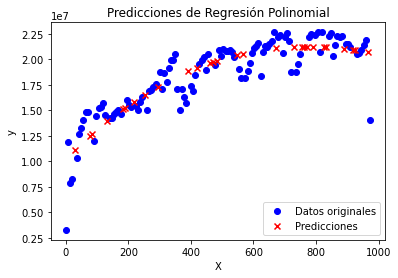

MSE en conjunto de prueba: 3646201549421.8267
MSE con validación cruzada: 2816755411949.1606


In [12]:
mse = mean_squared_error(yTest, yPred)

# Realizar validación cruzada con 5 pliegues
cv_scores = cross_val_score(poly_model, x_poly, yTrain, cv=5, scoring='neg_mean_squared_error')
mse_cv = -cv_scores.mean()  # Negate the scores to get positive MSE values

# Visualizar las predicciones
plt.scatter(xTrain, yTrain, label='Datos originales', color='blue')
plt.scatter(xTest, yPred, label='Predicciones', color='red', marker='x')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Predicciones de Regresión Polinomial')
plt.legend()
plt.show()

# Imprimir los resultados
print("MSE en conjunto de prueba:", mse)
print("MSE con validación cruzada:", mse_cv)